# Train the network on developpment set

## Import functions 

#### <span style="color:red">*JUST RUN CELL*</span>


In [1]:
import os 
import sys
import numpy as np
#os.chdir(os.path.join("/home/datawork-osmose/",'osmoseNotebooks_v0','source'))

with open('path_codes.txt') as f:
    codes_path = f.readlines()[0]
with open('path_osmose_dataset.txt') as f:
    path_osmose_dataset = f.readlines()[0]
with open('path_osmose_analysisAI.txt') as f:
    path_osmose_analysisAI = f.readlines()[0]
    
sys.path.append(os.path.join(codes_path))
#os.chdir(os.path.join(codes_path))


from train_network import TrainNetwork_main, plot_examples_from_validation, continue_training
from check_files_in_ai_folders import list_datasets, check_available_ai_tasks_bm, check_available_ai_datasplit, check_available_formats, check_available_ai_model

## Selection of task, benchmark and datasplit

In [2]:
check_available_ai_tasks_bm(path_osmose_analysisAI)

    Task_Glider_PBW_AnnotatorAnalysis/
        BM_merged15/
        BM_EXP/
        Comp_BM_curves/
        BM_merged6/
        BM_merged2_2/
        BM_merged2_3/
        BM_merged2_4/
        BM_merged2_5/
        BM_merged2_6/
        BM_merged2_7/
        BM_merged2_8/
        BM_merged8/
        BM_merged10/
        BM_merged12/
        BM_merged14/
        BM_merged2_9/
        BM_merged2_10/
        WeakLabelling_AllAnnotation/
        BM_AN_Nassau/
        BM_AN_Shanghai/
        BM_AN_Civitavecchia/
        BM_AN_Galveston/
        BM_AN_Venice/
        BM_AN_Fukuoka/
        BM_AN_Naples/
        BM_AN_Bridgetown/
        BM_AN_Valletta/
        BM_AN_Rostock/
        BM_AN_Dubrovnik/
        BM_AN_Mahahual/
        BM_AN_Ensenada/
        BM_AN_Tunis/
        BM_AN_Funchal/
        BM_AN_Tallinn/
        BM_AN_Malaga/
        BM_AN_Helsinki/
        BM_AN_Valencia/
        BM_FULL_EVAL/
        BM_FULL_EVAL_long/
    Task_Det_PBW/
        TEST1/
        TRAIN_Glider/
       

In [3]:
Task_ID = 'task_example_osmose_user'
BM_Name = 'bm_example_osmose_user'

In [4]:
check_available_ai_datasplit(path_osmose_analysisAI, Task_ID, BM_Name)

Datasplits available in this task and this benchmark : 
info_datasplit/
    split_for_eval_small/


In [5]:
SplitName = 'split_for_eval_small'

## Check model 

Choose the name of your new model. If the name already exist, it will be overwrited.

In [6]:
check_available_ai_model(path_osmose_analysisAI, Task_ID, BM_Name)

Models available in this task and this benchmark : 


In [8]:
model_name = 'm1'

## Check all spectrograms already available 


In [9]:
check_available_formats(path_osmose_dataset, path_osmose_analysisAI, Task_ID, BM_Name)

_______________
Dataset :  BlueFinLibrary_ElephantIsland2013Aural
Available Spectrogram Format (nfft_windowsize_overlap) :
     50_250
         512_512_92
     adjust_metadata.csv
_______________
Dataset :  BlueFinLibrary_ElephantIsland2014
Available Spectrogram Format (nfft_windowsize_overlap) :
     50_250
         512_512_92
     adjust_metadata.csv
_______________
Dataset :  BlueFinLibrary_RossSea2014
Available Spectrogram Format (nfft_windowsize_overlap) :
     150_250
         1024_512_95
         adjustment_spectros
     adjust_metadata.csv
     50_250
         512_512_92



Enter the spectrogram format in the corresponding parameters.
As list, to match with the list of dataset used in the benchmark (checked above).

Example with 2 dataset : 
- ``nfft`` = [1024, 4096] 
- ``window_size`` = [1024, 1024] 
- ``overlap`` = [80, 50]


It is also possible to use only .wav file as input, new spectrograms will be computed iteratively.
In this case, please fill also some other parameters for the computation of the new spectrograms : 

Nb : The wavefiles are normalized one by one using "data = (data - np.mean(data)) / np.std(data)". The normalization from instruments values to get absolute pressure level will be add on the next version.      


- ``dynamic_min`` = [-40, -40]
- ``dynamic_max`` = [40, 40]
- ``scaling`` = ['spectrum', 'spectrum']

In [10]:
input_data_format = 'audio' # 'audio'
# 'spectrogram' : use already computed spectrogram
# 'audio' : use .wav file, spectrogram will be computed iteratively

nfft = [512 for x in range(3)]
window_size = [512 for x in range(3)]
overlap = [92 for x in range(11)]


#Useless if input_data_format = 'spectrogram'
dynamic_min =  [-20 for x in range(3)]
dynamic_max =  [20 for x in range(3)]
scaling =  ['spectrum' for x in range(3)] # 'spectrum', 'density'

### Set model parameters

#### <span style="color:green">*LIST OF PARAMETERS*</span>

- `` architecture `` : Architecture of the model. Please, select one in this list : (for more details, check : https://pytorch.org/vision/main/models.html)
    - 'CNN3_FC1'
    - 'CNN3_FC3'
    - 'CNN4_FC3'
    - 'resnet18'
    - 'resnet50'
    - 'resnet101'
    - 'vgg11'
    - 'vgg11_bn'
    - 'vgg13'
    - 'vgg13_bn'
    - 'vgg19'
    - 'vgg19_bn'
    - 'alexnet'
   
    
- `` use_pretrained `` : (for more details, check : https://pytorch.org/vision/main/models.html) (By default : use_pretrained = True)
    - True : if you want to used already pretrained network one reference image dataset and just finetun the last layer 
    - False : if you want to train your network from random weights and adjust all layers


       
- `` TrainsetRatio `` : ratio between 0 and 1 of all the developpement set that will be used for the training (the oser part is for validation). (if None : TrainSetRatio = 0.9)

- `` batch_size `` : Number of spectrograms per batch (if None : batch_size = 10)
- `` learning_rate `` : step size at each iteration while moving toward a minimum of a loss function (if None : learning_rate = 1e-3)
- `` num_epochs `` : Number of iteration over all developpement set (if None : num_epochs = 10)




In [11]:
architecture = 'CNN3_FC3'
use_pretrained = False

TrainsetRatio = 0.9
batch_size = 10
learning_rate = 1e-4
num_epochs = 5
shuffle = 'True'

In [12]:
parameters = {'TrainsetRatio':TrainsetRatio, 'batch_size':batch_size, 'learning_rate':learning_rate, 'num_epochs':num_epochs, 'shuffle':shuffle, 'use_pretrained':use_pretrained, 'input_data_format':input_data_format, 'nfft':nfft, 'window_size':window_size, 'overlap':overlap, 'dynamic_min':dynamic_min, 'dynamic_max':dynamic_max, 'scaling':scaling}
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

MODEL INFORMATION : 
 
CNN3_FC3(
  (conv1): Sequential(
    (0): Conv2d(1, 64, kernel_size=(8, 8), stride=(4, 4))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): Sequential(
    (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2))
    (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (lin1): Linear(in_features=256, out_features=128, bias=True)
  (lin2): Linear(in_features=128, out_features=16, bias=True)
  (lin3): Linear(in_features=16, out_features=1, bias=True)
  (dout): Dropout(p=0.25, inplace=False)
)
Params to learn:
	 conv1.0.weight
	 conv1.0.bias
	 conv1.1.weight
	 conv1.1.bias
	 conv2.0.weight
	 conv2.0.bias
	 conv2.1.weight
	 conv2.1.bias
	 conv3.0.weight
	 conv3.0.bias
	 conv3.1.weight
	 conv3.1.bias
	

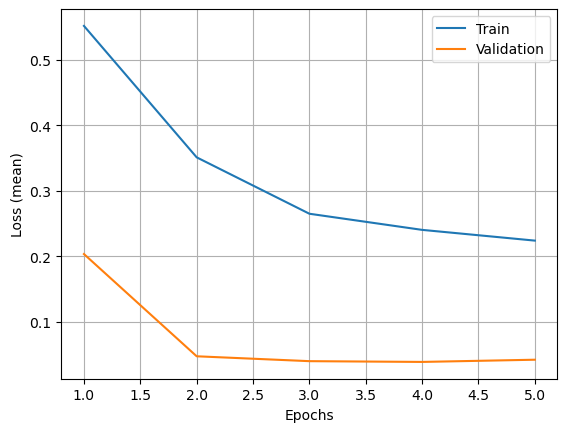

In [13]:
model_ft, validation_loader, LabelsList = TrainNetwork_main(path_osmose_dataset, path_osmose_analysisAI, Task_ID, BM_Name, SplitName, model_name, architecture, parameters)

### If you want to continue the training (val loss is still decreasing)

just set `` epochs_to_add `` = N (N as int) to add N epochs to the training

Nb : you can run the following function several times if needed

MODEL INFORMATION : 
 
Params to learn:
	 conv1.0.weight
	 conv1.0.bias
	 conv1.1.weight
	 conv1.1.bias
	 conv2.0.weight
	 conv2.0.bias
	 conv2.1.weight
	 conv2.1.bias
	 conv3.0.weight
	 conv3.0.bias
	 conv3.1.weight
	 conv3.1.bias
	 lin1.weight
	 lin1.bias
	 lin2.weight
	 lin2.bias
	 lin3.weight
	 lin3.bias
 
TRAINNING : 
Epoch TRAIN [6/10]  -- Loss = 0.21722310677699272  --  iteration [1815/1815]  
Epoch VALID [6/10]  -- Loss = 0.047609349382017274  --  iteration [201/201]  
Epoch TRAIN [7/10]  -- Loss = 0.20913504364979826  --  iteration [1815/1815]  
Epoch VALID [7/10]  -- Loss = 0.04922244454234773  --  iteration [201/201]]  
Epoch TRAIN [8/10]  -- Loss = 0.19113985111182633  --  iteration [1815/1815]  
Epoch VALID [8/10]  -- Loss = 0.04766178694791137  --  iteration [201/201]]  
Epoch TRAIN [9/10]  -- Loss = 0.18339612354645018  --  iteration [1815/1815]  
Epoch VALID [9/10]  -- Loss = 0.055878901555879386  --  iteration [201/201]  
Epoch TRAIN [10/10]  -- Loss = 0.16914134686787

(RecursiveScriptModule(
   original_name=CNN3_FC3
   (conv1): RecursiveScriptModule(
     original_name=Sequential
     (0): RecursiveScriptModule(original_name=Conv2d)
     (1): RecursiveScriptModule(original_name=BatchNorm2d)
   )
   (conv2): RecursiveScriptModule(
     original_name=Sequential
     (0): RecursiveScriptModule(original_name=Conv2d)
     (1): RecursiveScriptModule(original_name=BatchNorm2d)
   )
   (conv3): RecursiveScriptModule(
     original_name=Sequential
     (0): RecursiveScriptModule(original_name=Conv2d)
     (1): RecursiveScriptModule(original_name=BatchNorm2d)
   )
   (lin1): RecursiveScriptModule(original_name=Linear)
   (lin2): RecursiveScriptModule(original_name=Linear)
   (lin3): RecursiveScriptModule(original_name=Linear)
   (dout): RecursiveScriptModule(original_name=Dropout)
 ),
 array(['Bm'], dtype='<U2'))

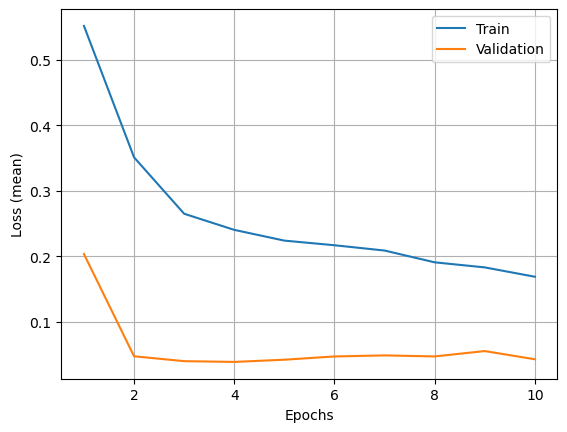

In [15]:
epochs_to_add = 5
continue_training(path_osmose_dataset, path_osmose_analysisAI, Task_ID, BM_Name, SplitName, model_name, architecture, parameters, epochs_to_add)

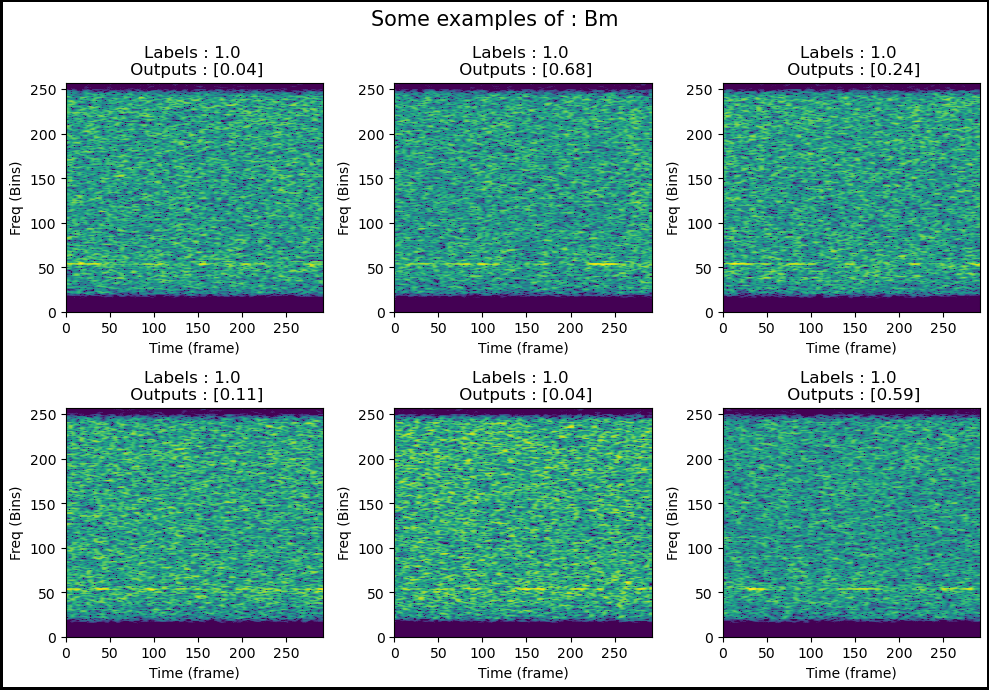

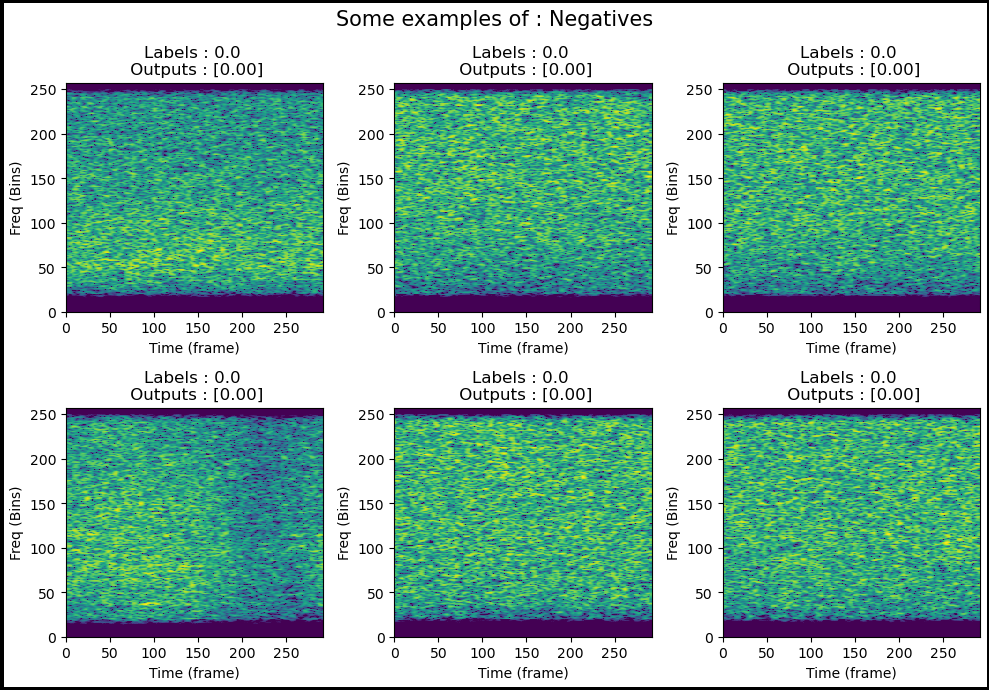

In [16]:
plot_examples_from_validation(model_ft, validation_loader, LabelsList)